# Cracked Stress Analysis - Rectangular Section

## Import modules

In [1]:
from concreteproperties.material import Concrete, SteelBar, SteelStrand
from concreteproperties.stress_strain_profile import (
    ConcreteLinear,
    RectangularStressBlock,
    SteelElasticPlastic,
    StrandHardening,
)
from sectionproperties.pre.library.primitive_sections import rectangular_section
from concreteproperties.pre import add_bar, add_bar_rectangular_array
from concreteproperties.prestressed_section import PrestressedSection

## Create materials

In [8]:
concrete = Concrete(
    name="40 MPa Concrete",
    density=2.4e-6,
    stress_strain_profile=ConcreteLinear(elastic_modulus=30e3),
    ultimate_stress_strain_profile=RectangularStressBlock(
        compressive_strength=40,
        alpha=0.79,
        gamma=0.87,
        ultimate_strain=0.003,
    ),
    flexural_tensile_strength=0,
    colour="lightgrey",
)

steel = SteelBar(
    name="500 MPa Steel",
    density=7.85e-6,
    stress_strain_profile=SteelElasticPlastic(
        yield_strength=500,
        elastic_modulus=200e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)

strand = SteelStrand(
    name="1830 MPa Strand",
    density=7.85e-6,
    stress_strain_profile=StrandHardening(
        yield_strength=1500,
        elastic_modulus=200e3,
        fracture_strain=0.035,
        breaking_strength=1830,
    ),
    colour="slategrey",
    prestress_force=900e3,
)

## Create geometry

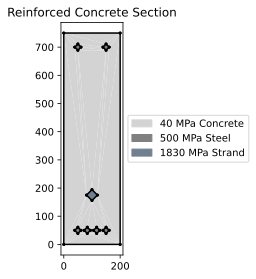

<AxesSubplot: title={'center': 'Reinforced Concrete Section'}>

In [9]:
geom = rectangular_section(d=750, b=200, material=concrete)

# add top steel bars
geom = add_bar_rectangular_array(
    geometry=geom, area=250, material=steel, n_x=2, x_s=100, anchor=(50, 700)
)

# add bottom steel bars
geom = add_bar_rectangular_array(
    geometry=geom, area=250, material=steel, n_x=4, x_s=100 / 3, anchor=(50, 50)
)

# add prestressing strand
geom = add_bar(
    geometry=geom,
    area=750,
    material=strand,
    x=100,
    y=750 - 575,
)

conc_sec = PrestressedSection(geometry=geom)
conc_sec.plot_section()

## Cracked analysis

In [16]:
m_ext = 400e6  # apply 400 kN.m moment
cr = conc_sec.calculate_cracked_properties(m_ext=0e6)

## Cracking moment

In [17]:
cr.print_results()

   Cracked Concrete Section   
          Properties          
┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property   ┃         Value ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ theta      │  0.000000e+00 │
│ n          │  9.000000e+05 │
│ m          │  0.000000e+00 │
│ M_cr_pos   │  2.929232e+08 │
│ M_cr_neg   │  5.441197e+07 │
│ d_nc       │  5.778392e+02 │
│ E.A_cr     │  3.864540e+09 │
│ E.Qx_cr    │  1.102510e+12 │
│ E.Qy_cr    │  3.864540e+11 │
│ x-Centroid │  1.000000e+02 │
│ y-Centroid │  2.852887e+02 │
│ E.Ixx_g_cr │  4.392230e+14 │
│ E.Iyy_g_cr │  5.070120e+13 │
│ E.Ixy_g_cr │  1.102510e+14 │
│ E.Ixx_c_cr │  1.246895e+14 │
│ E.Iyy_c_cr │  1.205580e+13 │
│ E.Ixy_c_cr │ -3.125000e-02 │
│ E.Iuu_cr   │  1.246895e+14 │
│ E.I11_cr   │  1.246895e+14 │
│ E.I22_cr   │  1.205580e+13 │
│ phi_cr     │  0.000000e+00 │
└────────────┴───────────────┘

## Confirm elastic stresses at cracking moment

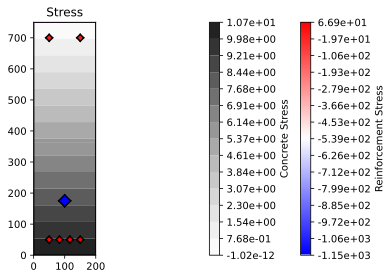

<AxesSubplot: title={'center': 'Stress'}>

In [19]:
res = conc_sec.calculate_uncracked_stress(m=cr.m_cr[1])
res.plot_stress()

## Visualise cracked stresses

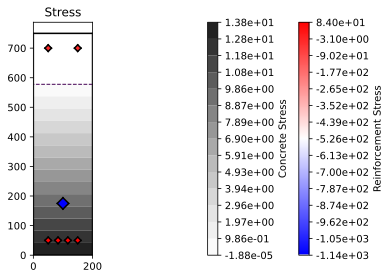

0.0
0.011877780943587423


In [20]:
res = conc_sec.calculate_cracked_stress(cracked_results=cr)
res.plot_stress()
print(res.sum_forces())
print(res.sum_moments()[0] / 1e6)

## Compare with textbook
![](img/rect_crack.jpg)

## Confirm cracked neutral axis depth

In [8]:
print(f"d_nc = {cr.d_nc:.2f} mm")

d_nc = 507.02 mm


## Print bar and strand stresses

In [9]:
from rich.pretty import pprint

pprint(res.lumped_reinforcement_stresses)
pprint(res.strand_stresses)

[
│   108.0620135959754,
│   108.06201359597547,
│   -45.62971756884211,
│   -45.629717568842096,
│   -45.62971756884207,
│   -45.629717568842054
]

[-1216.0735820877183]